1) Считывание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


2) Визуализация распределения значения признаков

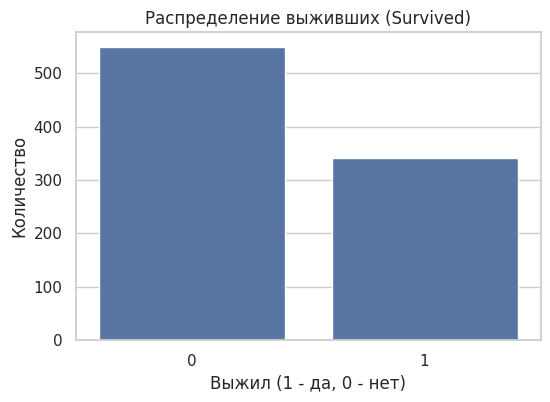

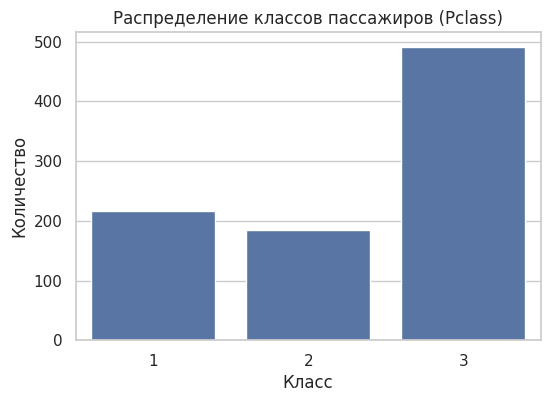

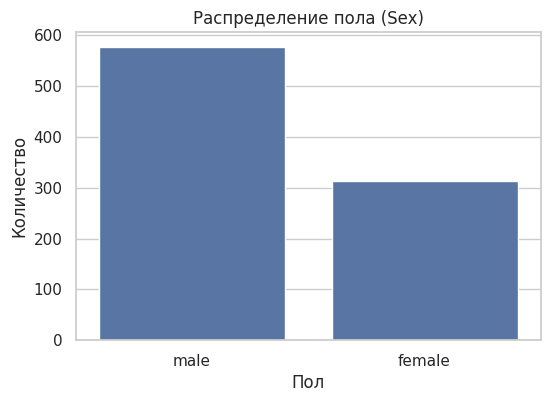

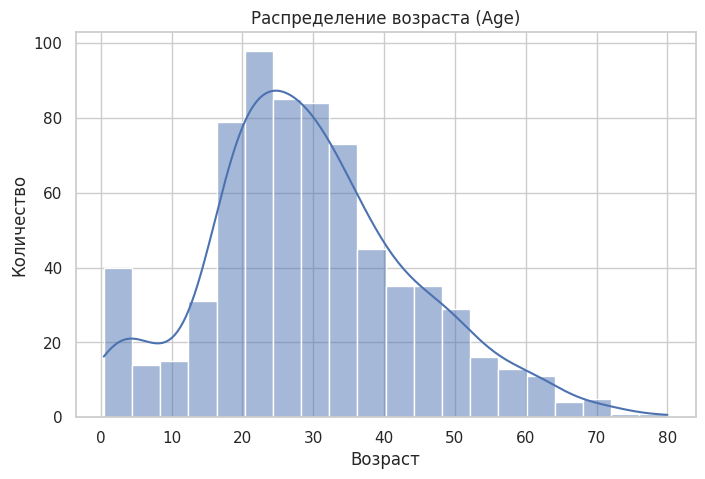

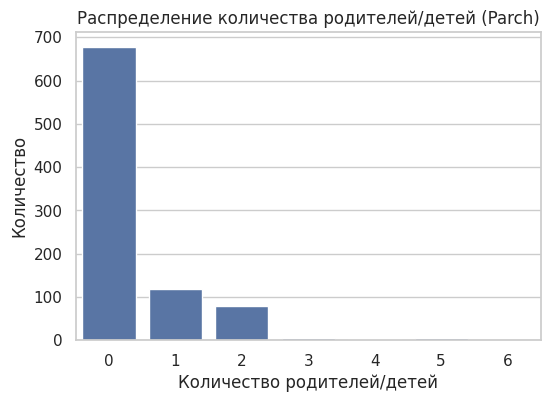

In [2]:
# Настройка графиков
sns.set(style="whitegrid")

# Распределение Survived
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Распределение выживших (Survived)')
plt.xlabel('Выжил (1 - да, 0 - нет)')
plt.ylabel('Количество')
plt.show()

# Распределение Pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Распределение классов пассажиров (Pclass)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Распределение Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Распределение пола (Sex)')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Распределение Age (гистограмма)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Распределение возраста (Age)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Распределение Parch
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Parch')
plt.title('Распределение количества родителей/детей (Parch)')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество')
plt.show()

3) график типа boxplot для столбца Age

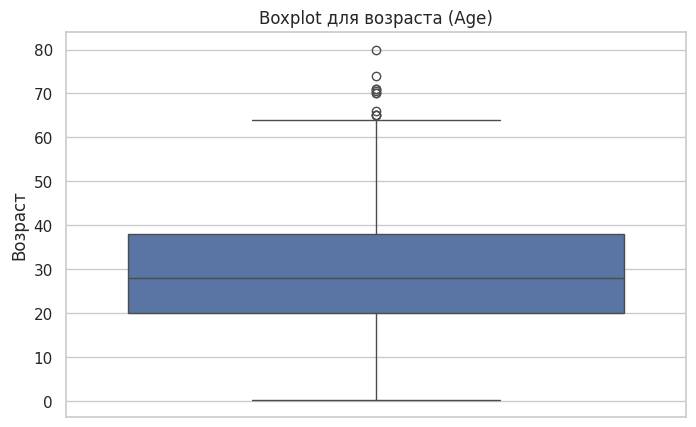

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Age')
plt.title('Boxplot для возраста (Age)')
plt.ylabel('Возраст')
plt.show()

Медиана (толстая линия) - Это среднее значение возраста.
Прямоугольник - Охватывает межквартильный размах (25%–75% данных).
Усы - Показывают нормальный диапазон данных.
Выбросы - Это значения, которые значительно отличаются от основной массы данных.

4) график типа pie chart

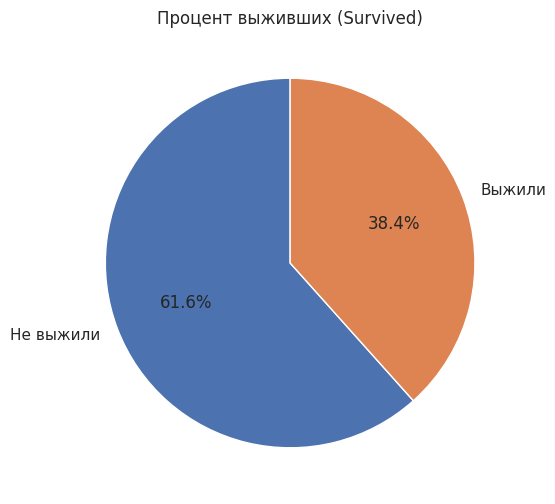

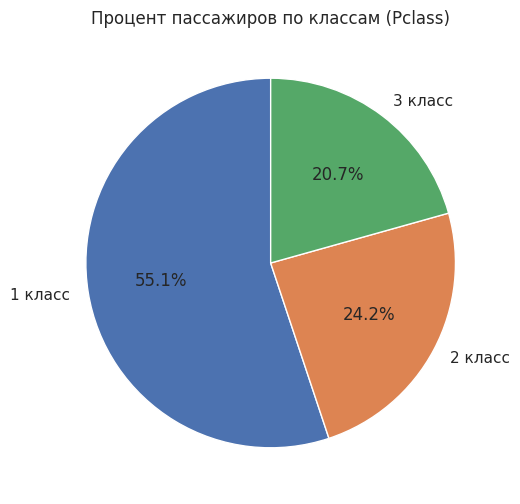

In [7]:
# Pie chart для Survived
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Не выжили', 'Выжили'], autopct='%1.1f%%', startangle=90)
plt.title('Процент выживших (Survived)')
plt.show()

# Pie chart для Pclass
pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=['1 класс', '2 класс', '3 класс'], autopct='%1.1f%%', startangle=90)
plt.title('Процент пассажиров по классам (Pclass)')
plt.show()

5) график типа pairplot

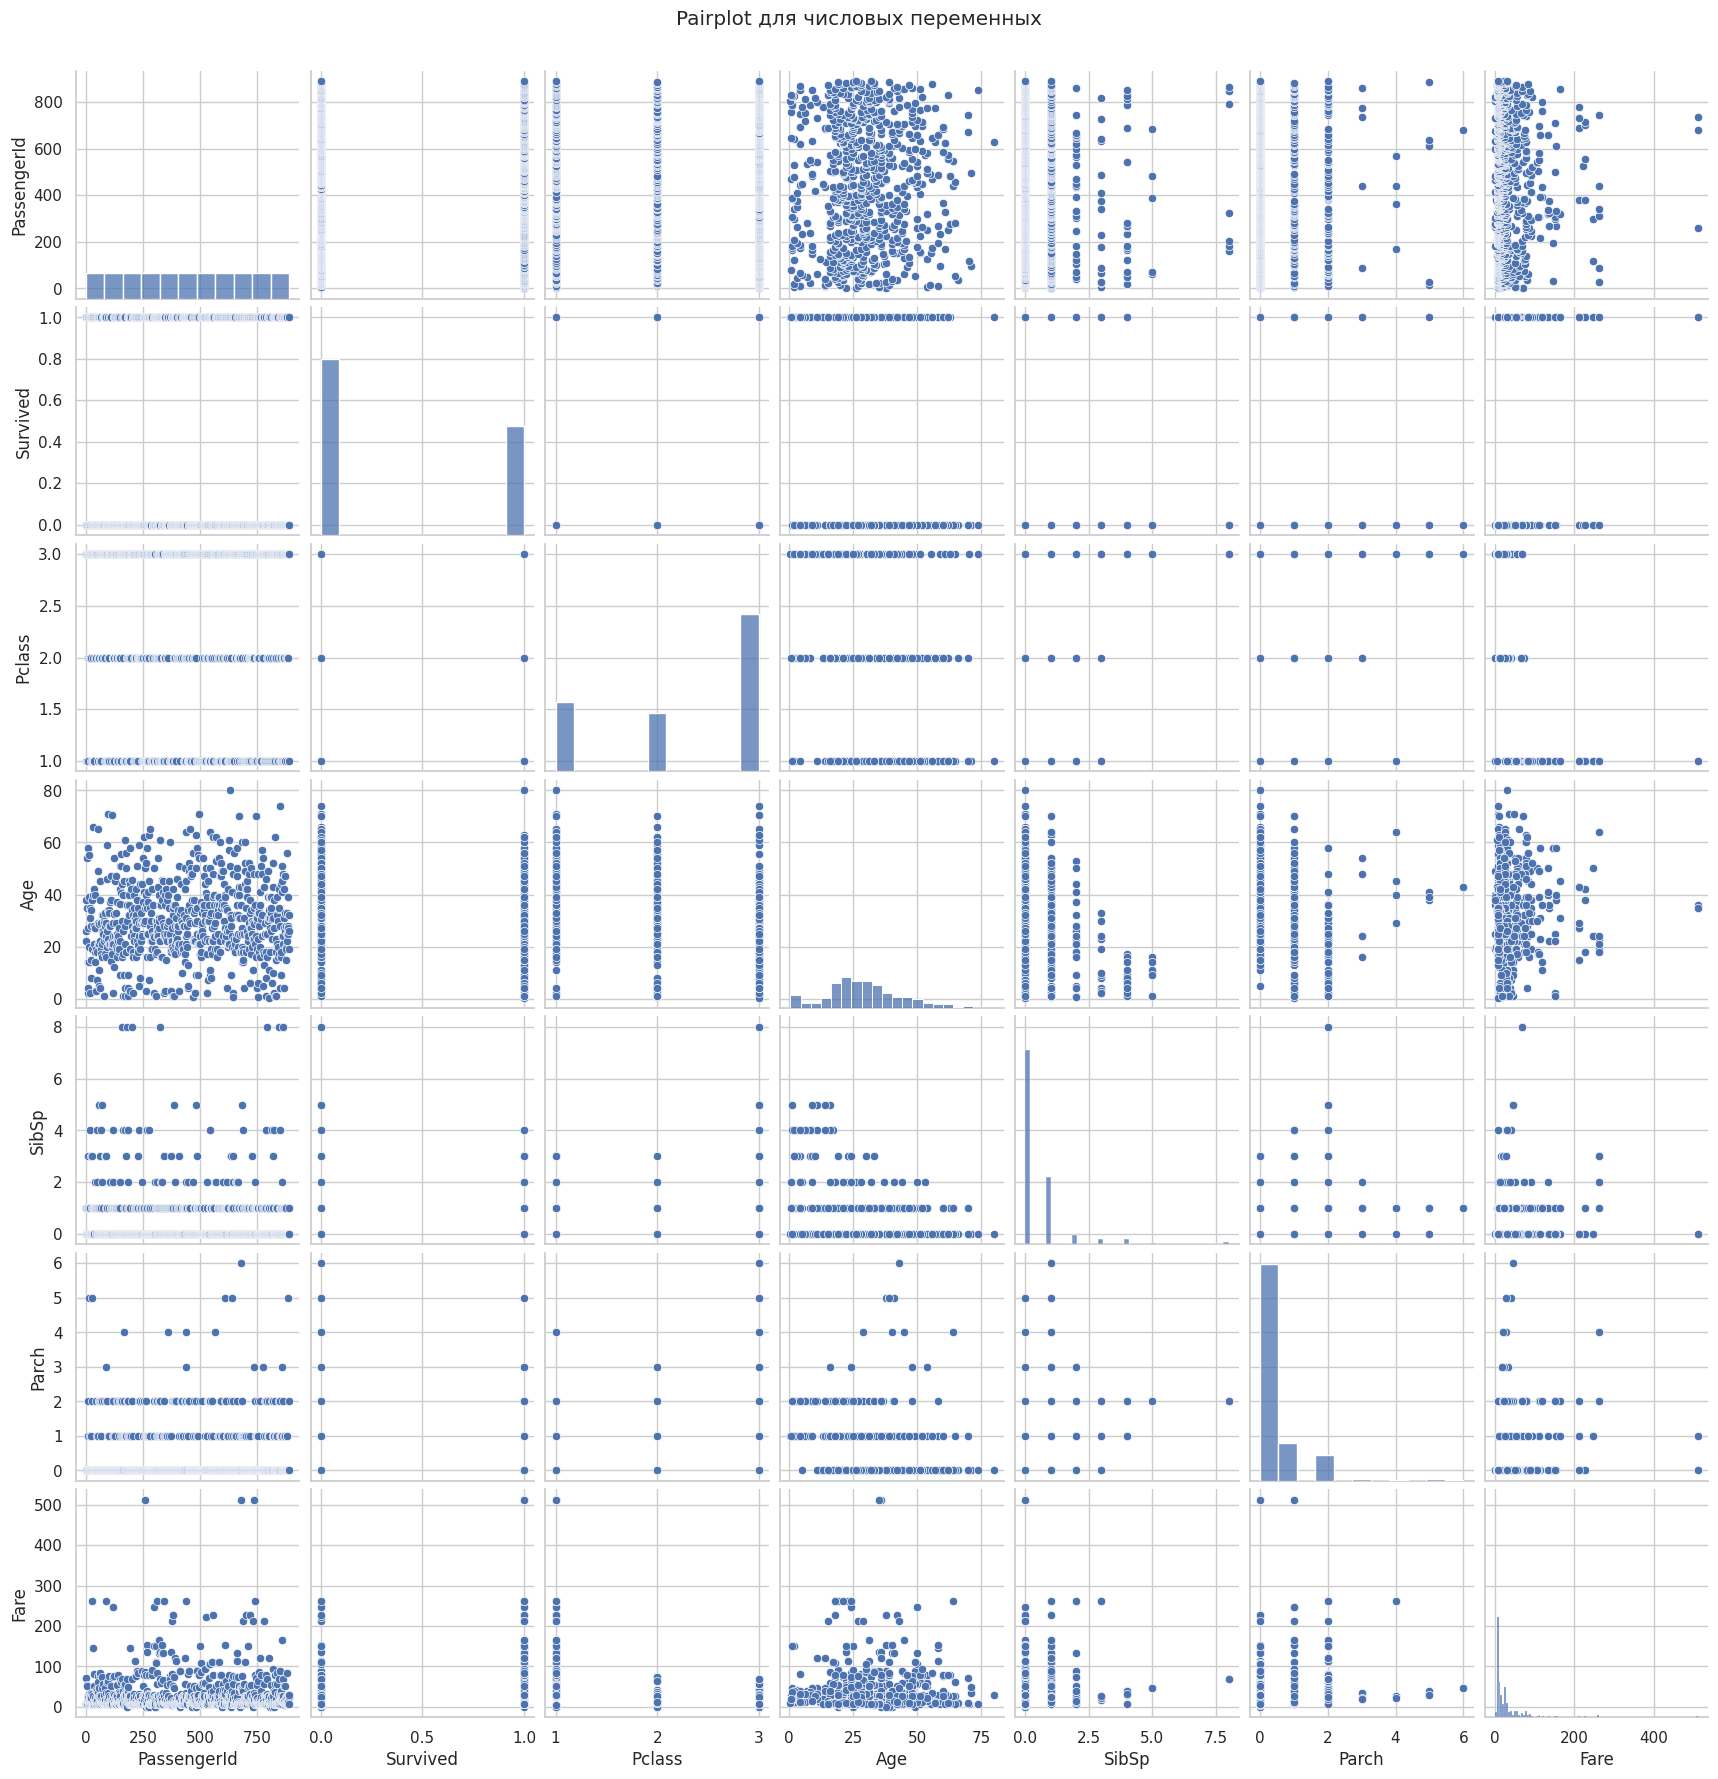

In [8]:
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Строим pairplot
sns.pairplot(numeric_columns)
plt.suptitle('Pairplot для числовых переменных', y=1.02)
plt.show()

6) интерактивный sunburst plot

In [10]:
# Группируем данные по классам и полу
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Строим sunburst plot
fig = px.sunburst(sunburst_data, path=['Pclass', 'Sex'], values='Count',
                  title='Sunburst plot: Классы и пол пассажиров')
fig.show()